#1.Загрузка данных

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
!unzip -n /content/gdrive/MyDrive/ml_data/lib2/course_project.zip

Archive:  /content/gdrive/MyDrive/ml_data/lib2/course_project.zip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

In [4]:
!pip install catboost

In [5]:
train_path = "/content/course_project_train.csv"
test_path = "/content/course_project_test.csv"

In [6]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

#2.Предобработка данных

In [7]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [8]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

Преобразуем строки и востановим пропуски с помощью IterativeImputer

In [10]:
df_train["Home Ownership"].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [11]:
df_train["Years in current job"].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [12]:
df_train["Purpose"].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [13]:
df_train["Term"].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [14]:
def preproch_data(df):
    df["Home Ownership"] = df["Home Ownership"].astype('category')
    df["Home Ownership"] = df["Home Ownership"].cat.codes
    df["Years in current job"] = df["Years in current job"].astype('category')
    df["Years in current job"] = df["Years in current job"].cat.codes
    df["Purpose"] = df["Purpose"].astype('category')
    df["Purpose"] = df["Purpose"].cat.codes
    df["Term"] = df["Term"].astype('category')
    df["Term"] = df["Term"].cat.codes
    imputer = IterativeImputer()
    t = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    for i in df.isnull().sum()[df.isnull().sum()>0].keys():
      df[i][df[i].isnull()] = t[i][df[i].isnull()]
    df['Tax Liens'] = df['Tax Liens'].astype('int8')
    df['Number of Credit Problems'] = df['Number of Credit Problems'].astype('int8')

In [15]:
preproch_data(df_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   int8   
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   int8   
 3   Tax Liens                     7500 non-null   int8   
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   int8   
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   int8   
 11  Term                          7500 non-null   int8   
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

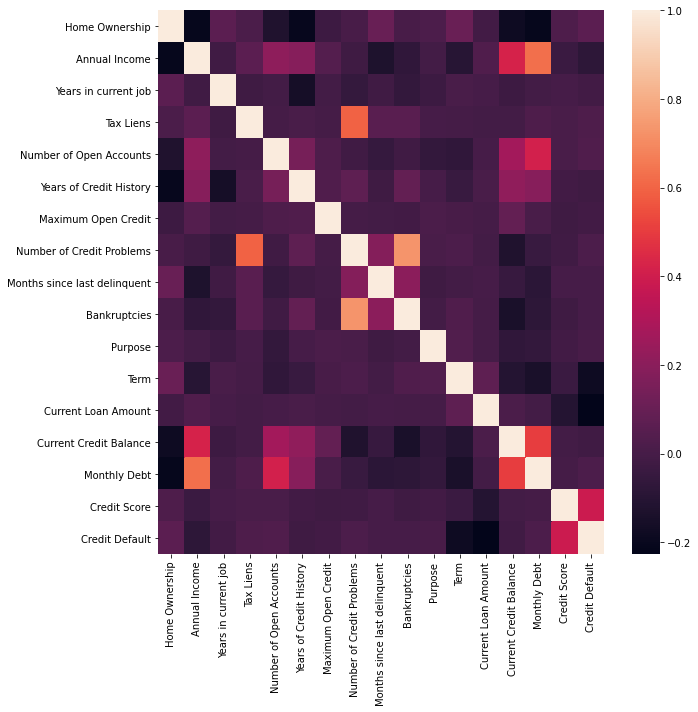

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.corr())
plt.show()

Нет особо высокой корреляции между признаками.  
Также нет корреляции между целевой переменной и отдельными признаками

In [18]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [19]:
df_train = balance_df_by_target(df_train, 'Credit Default')

#3.Разбиение тестовой выорки

In [20]:
X = df_train.drop('Credit Default', axis=1)
y = df_train['Credit Default']

In [21]:
y.value_counts()

0    5387
1    4226
Name: Credit Default, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25)

#4.Обучение

In [24]:
import catboost as catb
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [25]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [26]:
%%time

cat_features_idx = [col for col in df_train.drop('Credit Default', axis=1).columns \
                     if len(df_train[col].unique()) <= 15] 

model_catb = catb.CatBoostClassifier(silent=True, loss_function='CrossEntropy')
model_catb.fit(X_train, y_train, cat_features=cat_features_idx)

y_train_pred = model_catb.predict(X_train)
y_valid_pred = model_catb.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      4023
           1       0.95      0.88      0.91      3186

    accuracy                           0.92      7209
   macro avg       0.93      0.92      0.92      7209
weighted avg       0.93      0.92      0.92      7209

TEST

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1364
           1       0.78      0.72      0.75      1040

    accuracy                           0.79      2404
   macro avg       0.79      0.78      0.79      2404
weighted avg       0.79      0.79      0.79      2404

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1159  205
1                295  745
CPU times: user 28.6 s, sys: 2.95 s, total: 31.5 s
Wall time: 17.6 s


#5.Создание ответа

In [27]:
preproch_data(df_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [28]:
y_test_pred_CatB = model_catb.predict(df_test)

In [29]:
sub_df = pd.DataFrame({'Id' : range(df_test.shape[0]),
                       'Credit Default' : y_test_pred_CatB})

In [30]:
sub_df.to_csv("/content/Takaev_B_predicts.csv", index=False)

#6.Вывод

Самую лучшую оценку на отложенной выборке дал алгоритм CatBoost, тк алгоритм сам способен хорошо работать с категориальными признакими, способен создавать доп признаки и может хорошо рабоать при минимальном предроцессинге данных и настройке гиперпараметров. Но данный алгоритм работает значительно медленнее остальных.